<a href="https://colab.research.google.com/github/pvenkatkishn/pvenkatkishn/blob/main/K12_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import requests
import pandas as pd
from io import StringIO
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
file = "https://docs.google.com/spreadsheets/d/1D7RV5ePxpSTbhV5SNjljJE-TlOrkA5OC/edit?usp=sharing&ouid=115264740209037590440&rtpof=true&sd=true"

file_id = file.split('/')[-2]

dwn_url = f"https://docs.google.com/spreadsheets/d/{file_id}/export?format=csv"
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
df = pd.read_csv(csv_raw, sep=",")
print(df.head())

   year   leaid          district state_name stabbr  ppcstot  predcost  \
0  2021  100005  ALBERTVILLE CITY    Alabama     AL     9364     14234   
1  2021  100030    ALEXANDER CITY    Alabama     AL    10650     19168   
2  2021  100060    ANDALUSIA CITY    Alabama     AL    10146     20621   
3  2021  100090     ANNISTON CITY    Alabama     AL    12593     35826   
4  2021  100100         ARAB CITY    Alabama     AL     9498      8927   

   fundinggap  outcomegap  enroll       pov       iep       ell     amind  \
0       -4870         NaN    5842  0.223222  0.080794  0.207977  0.002910   
1       -8518         NaN    2948  0.275974  0.136703  0.033582  0.009159   
2      -10475         NaN    1785  0.293603  0.164706  0.007843  0.004482   
3      -23233         NaN    1898  0.354048  0.113277  0.012645  0.001054   
4         571         NaN    2609  0.169536  0.101188  0.011882  0.004216   

      asian     black      hisp     multi       pac     white  
0  0.004622  0.041938  0.526

In [36]:
#Data Quality Analysis
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

duplicates = df.duplicated().sum()
print("\nDuplicate rows:", duplicates)

print(df.info())


Missing values:
 year              0
leaid             0
district          0
state_name        0
stabbr            0
ppcstot           0
predcost          0
fundinggap        0
outcomegap    45154
enroll            0
pov               0
iep            4011
ell            1286
amind             0
asian             0
black             0
hisp              0
multi         19668
pac           22171
white             0
dtype: int64

Duplicate rows: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159034 entries, 0 to 159033
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   year        159034 non-null  int64  
 1   leaid       159034 non-null  int64  
 2   district    159034 non-null  object 
 3   state_name  159034 non-null  object 
 4   stabbr      159034 non-null  object 
 5   ppcstot     159034 non-null  int64  
 6   predcost    159034 non-null  int64  
 7   fundinggap  159034 non-null  int64  
 8   outcomegap  113

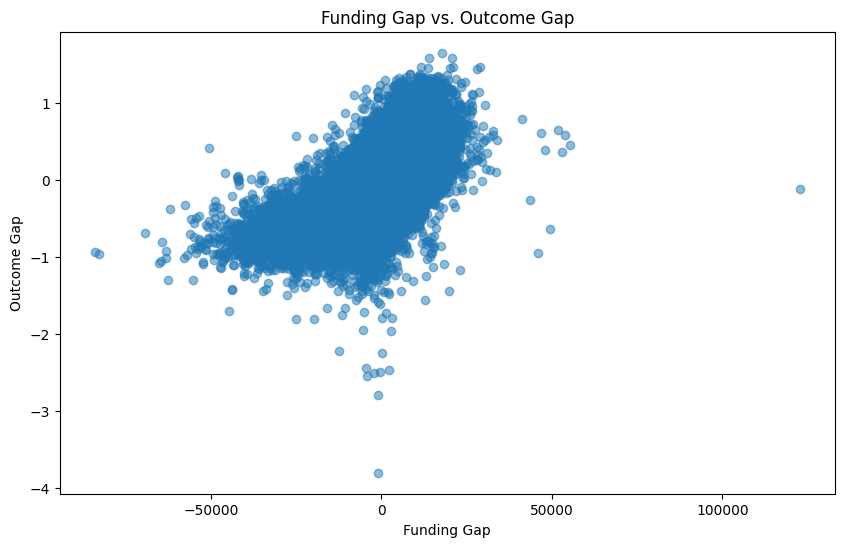

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(df['fundinggap'], df['outcomegap'], alpha=0.5)


plt.xlabel('Funding Gap')
plt.ylabel('Outcome Gap')
plt.title('Funding Gap vs. Outcome Gap')

plt.show()


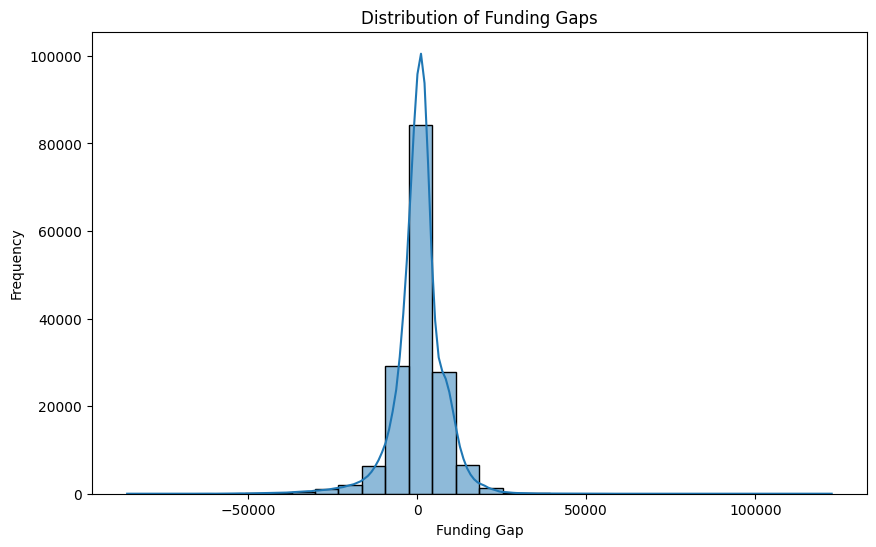

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(df['fundinggap'], bins=30, kde=True)
plt.xlabel('Funding Gap')
plt.ylabel('Frequency')
plt.title('Distribution of Funding Gaps')
plt.show()



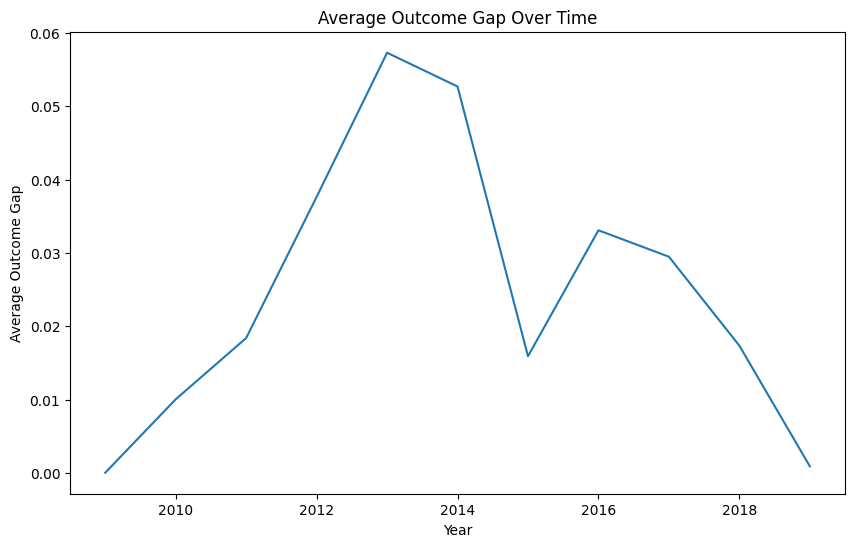

In [39]:
# Calculate average outcome gap by year
avg_outcome_gap_by_year = df.groupby('year')['outcomegap'].mean().reset_index()

# Create the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='outcomegap', data=avg_outcome_gap_by_year)
plt.xlabel('Year')
plt.ylabel('Average Outcome Gap')
plt.title('Average Outcome Gap Over Time')
plt.show()

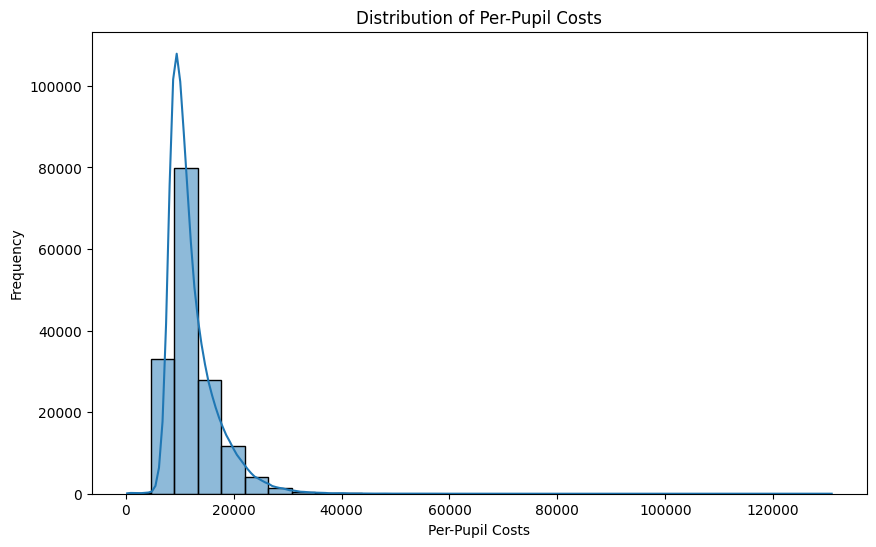

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(df['ppcstot'], bins=30, kde=True)
plt.xlabel('Per-Pupil Costs')
plt.ylabel('Frequency')
plt.title('Distribution of Per-Pupil Costs')
plt.show()

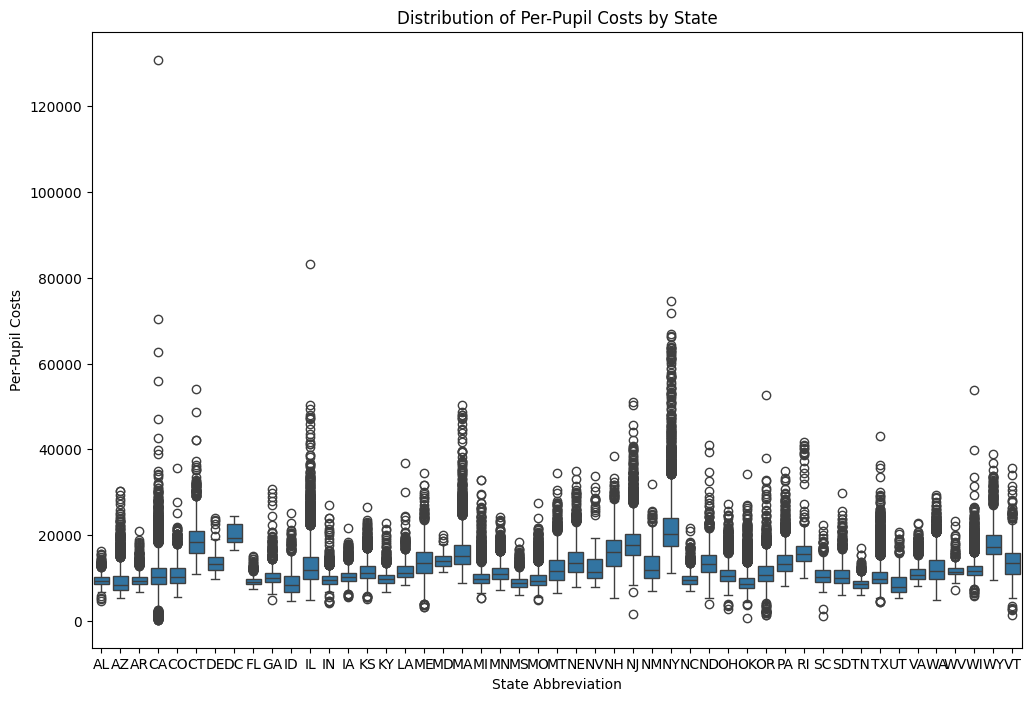

In [41]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='stabbr', y='ppcstot', data=df)
plt.xlabel('State Abbreviation')
plt.ylabel('Per-Pupil Costs')
plt.title('Distribution of Per-Pupil Costs by State')
plt.show()

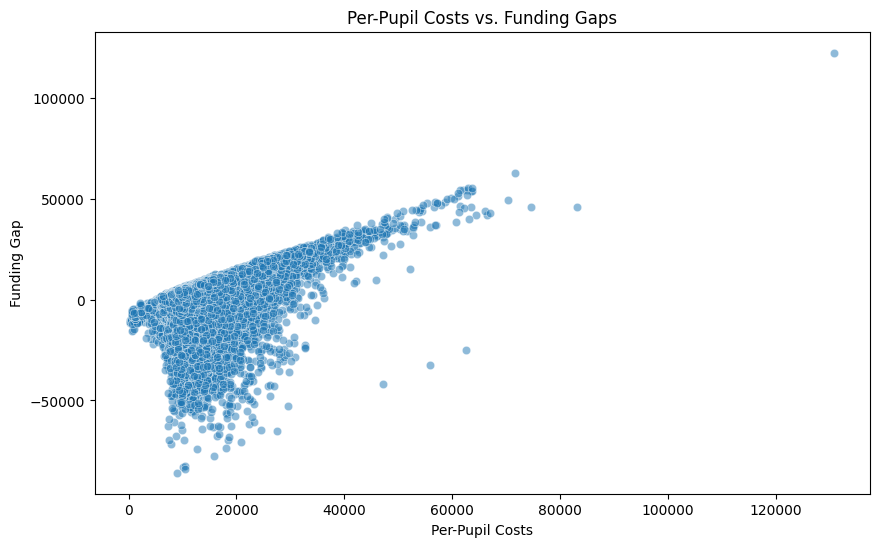

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ppcstot', y='fundinggap', data=df, alpha=0.5)
plt.xlabel('Per-Pupil Costs')
plt.ylabel('Funding Gap')
plt.title('Per-Pupil Costs vs. Funding Gaps')
plt.show()

<h1>From the visualizations, we can infer the following:

<h3>Funding and Outcomes:

1. There's no clear correlation between funding gap and outcome gap. This suggests that simply increasing funding may not directly lead to improved student outcomes. Other factors likely play a significant role.
2. The average outcome gap has remained relatively stable over time, indicating that any changes in funding haven't had a dramatic impact on student outcomes.
3. Per-Pupil Costs: There's significant variation in per-pupil costs across states. This could be due to differences in cost of living, state funding formulas, or other factors.
4. The distribution of per-pupil costs is skewed to the right, with a few schools having much higher costs than others. This could indicate disparities in funding or spending efficiency.
5. Funding Gaps:The funding gaps are mostly concentrated around the lower end, with a few outliers at the higher end. This suggests that most schools are funded relatively close to their predicted costs, but some schools have significant funding gaps.

Additional Insights:

There's a slight positive relationship between per-pupil costs and funding gaps, but it's not very strong. This suggests that higher per-pupil costs don't necessarily translate to larger funding gaps.


